In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

# change current working directory to the root of the project
import os
os.chdir(os.path.dirname(os.getcwd()))

# Purpose
- Purpose of this notebook is to build baseline models

In [2]:
import warnings
from IPython.display import display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)

/var/folders/rx/jl4f7yr95xd03cgb4sg2w99h0000gn/T/ipykernel_2360/4075833985.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


# Load Data

In [4]:
nrows = None
X_train = pd.read_csv("data/transformed/X_train.csv", nrows=nrows)
X_test = pd.read_csv("data/transformed/X_test.csv", nrows=nrows)

y_train = pd.read_csv("data/transformed/y_train.csv", nrows=nrows)
y_train = y_train.rename(columns={"5": "activity"})
y_test = pd.read_csv("data/transformed/y_test.csv", nrows=nrows)
y_test = y_test.rename(columns={"5": "activity"})

display(X_test.head())
display(y_test.head())

,user_id,timestamp,x,y,z
0,13,0,0.0,0.0,0.0
1,13,0,0.0,0.0,0.0
2,13,0,0.0,0.0,0.0
3,13,0,0.0,0.0,0.0
4,13,0,0.0,0.0,0.0


,activity
0,Jogging
1,Jogging
2,Jogging
3,Jogging
4,Jogging


# Baseline Model 1
- Zero-Rate Model
- Predcit the most frequent class

In [5]:
class BaselineModelZeroR:
    '''ZeroR baseline model that always predicts the most frequent class'''
    
    def fit(self, X_train: pd.DataFrame, y_train: pd.Series):
        pass
        
    def predict(self, X: pd.DataFrame, y: pd.DataFrame) -> pd.DataFrame:

        # merge X and y on index
        df = X.merge(y, left_index=True, right_index=True)

        # get the most frequent class
        most_frequent_class = df['activity'].value_counts().index[0]

        # create predictions
        predictions = [most_frequent_class] * len(df)

        return np.array(predictions)

In [6]:
model = BaselineModelZeroR()
model.fit(X_train, y_train)
predictions_baseline_model_1 = model.predict(X_test, y_test)

Classification Report
---------------------


/Users/ani/Projects/4_conformal_prediction_using_LSTM/.4_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ani/Projects/4_conformal_prediction_using_LSTM/.4_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  Downstairs       0.00      0.00      0.00     28372
     Jogging       0.00      0.00      0.00     85115
     Sitting       0.00      0.00      0.00     10985
    Standing       0.00      0.00      0.00      9495
    Upstairs       0.00      0.00      0.00     41115
     Walking       0.34      1.00      0.51     91540

    accuracy                           0.34    266622
   macro avg       0.06      0.17      0.09    266622
weighted avg       0.12      0.34      0.18    266622



/Users/ani/Projects/4_conformal_prediction_using_LSTM/.4_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


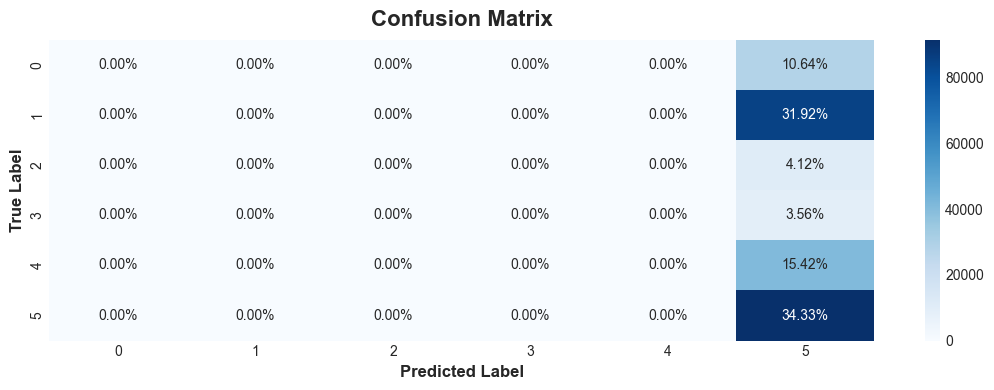

In [7]:
# create confusion matrix for multiclass classification as percentage
cm = confusion_matrix(y_test, predictions_baseline_model_1)

group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [v1 for v1 in zip(group_percentages)]
labels = np.asarray(labels).reshape(6,6)

# classification report
print('Classification Report')
print('---------------------')
print(classification_report(y_test, predictions_baseline_model_1))

# plot confusion matrix
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Baseline Model 2
- Random-Rate Model
- Predicts a random class with the same probability as the most frequent class

In [8]:
class BaselineModelRandom:
    '''Random baseline model that randomly predicts 0 or 1 based on the distribution of the training set'''

    def fit(self, X_train: pd.DataFrame, y_train: pd.Series):
        pass
        
    def predict(self, X: pd.DataFrame, y: pd.DataFrame) -> pd.DataFrame:

        # merge X and y on index
        df = X.merge(y, left_index=True, right_index=True)

        # get the distribution of the training set
        distribution = df['activity'].value_counts(normalize=True)

        # create predictions
        predictions = np.random.choice(distribution.index, size=len(df), p=distribution.values)

        return np.array(predictions)

In [9]:
model = BaselineModelRandom()
model.fit(X_train, y_train)
predictions_baseline_model_2 = model.predict(X_test, y_test)

Classification Report
---------------------
              precision    recall  f1-score   support

  Downstairs       0.11      0.11      0.11     28372
     Jogging       0.32      0.32      0.32     85115
     Sitting       0.04      0.04      0.04     10985
    Standing       0.04      0.04      0.04      9495
    Upstairs       0.15      0.15      0.15     41115
     Walking       0.34      0.34      0.34     91540

    accuracy                           0.26    266622
   macro avg       0.17      0.17      0.17    266622
weighted avg       0.26      0.26      0.26    266622



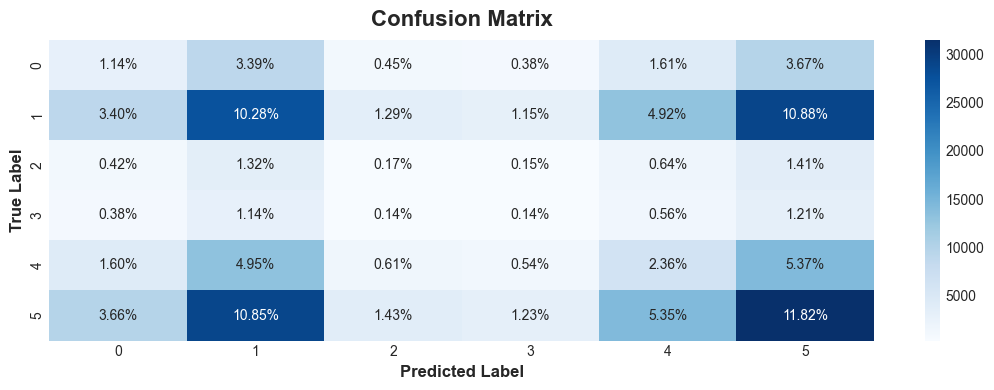

In [10]:
# create confusion matrix for multiclass classification as percentage
cm = confusion_matrix(y_test, predictions_baseline_model_2)

group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [v1 for v1 in zip(group_percentages)]
labels = np.asarray(labels).reshape(6,6)

# classification report
print('Classification Report')
print('---------------------')
print(classification_report(y_test, predictions_baseline_model_2))

# plot confusion matrix
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [11]:
# save predictions
pd.DataFrame(predictions_baseline_model_2).to_csv("predictions/predictions_baseline_model_2.csv", index=False)

# save predictions
pd.DataFrame(predictions_baseline_model_1).to_csv("predictions/predictions_baseline_model_1.csv", index=False)
